# House-Price-Prediction

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import datasets

In [3]:
boston = pd.read_csv('./housing.data.csv')

In [7]:
boston.shape
boston.head()
boston.describe()

(506, 14)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

# Looking into correlations

In [13]:
boston_corr = boston.corr()
boston_corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


# Heat map to visualize correlations

<Figure size 1000x1000 with 0 Axes>

<Axes: >

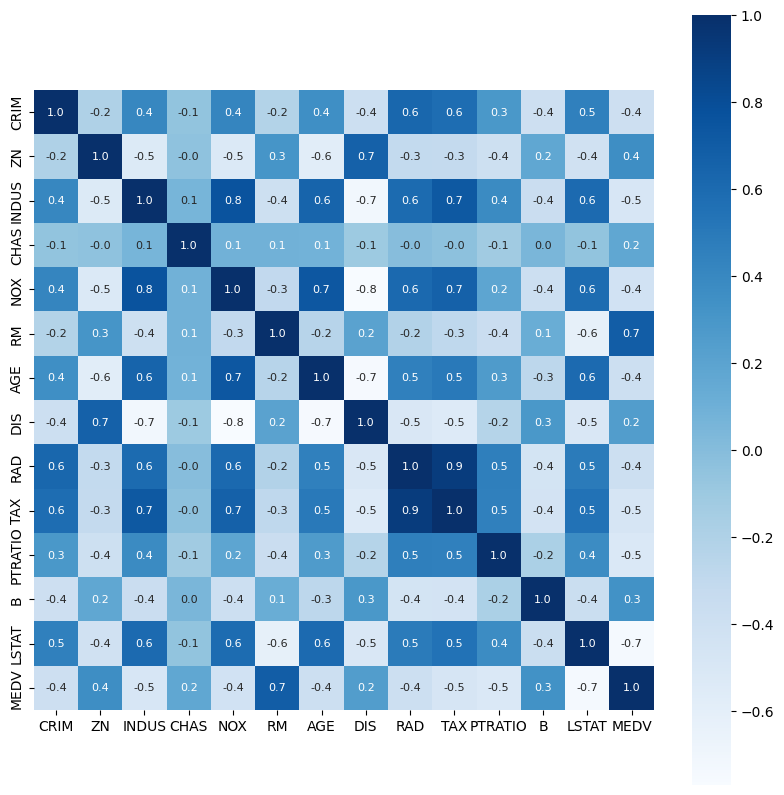

In [27]:
plt.figure(figsize=(10, 10))
sns.heatmap(boston_corr, cbar=True, square=True, fmt='.1f',
            annot=True, annot_kws={'size': 8}, cmap='Blues')

# Train test splitting

In [28]:
X = boston.drop(columns='MEDV')
y = boston['MEDV']

In [29]:
X
y

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2)

In [31]:
X.shape
X_train.shape
X_test.shape

(506, 13)

(404, 13)

(102, 13)

# Model training and evaluation

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


def evaluate_regressor(regressor, regressor_name, X_test, y_test):
    regressor.fit(X_train, y_train)
    
    y_predictions = regressor.predict(X_test)

    mse = mean_squared_error(y_test, y_predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_predictions)
    r2 = r2_score(y_test, y_predictions)

    print(f"{regressor_name} Results:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R-squared (R2): {r2}")
    print("\n")

In [35]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

In [47]:
regressors = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'XGBRegressor': XGBRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor(),
    'SVR': SVR(),
    'MLPRegressor': MLPRegressor(),
}

for regressor_name, regressor in regressors.items():
    evaluate_regressor(regressor, regressor_name, X_train, y_train)

LinearRegression Results:
Mean Squared Error (MSE): 22.95369357611288
Root Mean Squared Error (RMSE): 4.791001312472464
Mean Absolute Error (MAE): 3.384457539916794
R-squared (R2): 0.7285831776605591


Ridge Results:
Mean Squared Error (MSE): 23.123561118988242
Root Mean Squared Error (RMSE): 4.808696405366868
Mean Absolute Error (MAE): 3.3662999390828685
R-squared (R2): 0.7265745724418409


Lasso Results:
Mean Squared Error (MSE): 27.8073090217106
Root Mean Squared Error (RMSE): 5.2732636025245885
Mean Absolute Error (MAE): 3.695358402053465
R-squared (R2): 0.6711914173003578


ElasticNet Results:
Mean Squared Error (MSE): 27.466550841064624
Root Mean Squared Error (RMSE): 5.240854018293643
Mean Absolute Error (MAE): 3.68436696118252
R-squared (R2): 0.675220725362279


DecisionTreeRegressor Results:
Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0
Mean Absolute Error (MAE): 0.0
R-squared (R2): 1.0


RandomForestRegressor Results:
Mean Squared Error (MSE): 1.3789506212

In [46]:
regressors = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'XGBRegressor': XGBRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor(),
    'SVR': SVR(),
    'MLPRegressor': MLPRegressor(),
}

for regressor_name, regressor in regressors.items():
    evaluate_regressor(regressor, regressor_name, X_test, y_test)

LinearRegression Results:
Mean Squared Error (MSE): 18.495420122448426
Root Mean Squared Error (RMSE): 4.300630200615768
Mean Absolute Error (MAE): 3.1130437468934233
R-squared (R2): 0.7789207451814414


Ridge Results:
Mean Squared Error (MSE): 18.95642787895903
Root Mean Squared Error (RMSE): 4.353898009710267
Mean Absolute Error (MAE): 3.164121497971409
R-squared (R2): 0.7734102322760742


Lasso Results:
Mean Squared Error (MSE): 22.766241362875572
Root Mean Squared Error (RMSE): 4.771398260769643
Mean Absolute Error (MAE): 3.4799928396607154
R-squared (R2): 0.7278708111412346


ElasticNet Results:
Mean Squared Error (MSE): 22.57874209261212
Root Mean Squared Error (RMSE): 4.751709386380035
Mean Absolute Error (MAE): 3.449914313586876
R-squared (R2): 0.7301120253809996


DecisionTreeRegressor Results:
Mean Squared Error (MSE): 23.439999999999998
Root Mean Squared Error (RMSE): 4.841487374764082
Mean Absolute Error (MAE): 3.527450980392156
R-squared (R2): 0.7198172467216708


RandomFo